# Week2授業課題 富士下山

# この課題の目的


# 問題１：断面図の作成

- 断面図をMatplotlibを使い作成する。

- x=136の地点の赤い点や矢印も表示させる。

### 考え方の順序

1. データを読み込む

2. 必要なデータを抽出する（x = "distance", y = "elevation"）

3. matplotlib.pyplotで可視化する (頂点の座標を矢印付きでコメントする)

In [31]:
import numpy as np

np.set_printoptions(suppress = True) # 指数表示の禁止を設定する

# データセットの読み込み
fuji = np.loadtxt("week2_session_mtfuji_data.csv", delimiter="," , skiprows=1) # skiprows: 1行目を読み込まない（skipする）
print(type(fuji))

# データを表示する
print("次元数：{}".format(fuji.ndim))
print("形状：{}".format(fuji.shape))

<class 'numpy.ndarray'>
次元数：2
形状：(300, 5)


In [32]:
# データの生成
locations = fuji[:, 0]   # 地点を取得
elevations = fuji[:, 3] # 標高を取得

Text(90, 3000, 'You')

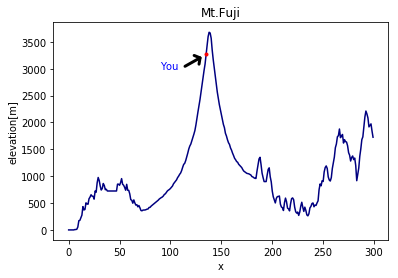

In [33]:
# Matplotlibで可視化
import matplotlib.pyplot as plt

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")

plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く
plt.plot(locations[135], elevations[135], c = "r", marker = ".") # 頂点をplotする

plt.annotate(s='', xy=(110, 3000),xytext=(135 ,elevations[135]),xycoords='data',\
            arrowprops=dict(facecolor='black',arrowstyle='<-, head_width=0.5',lw=3,shrinkA=5,shrinkB=5))

plt.annotate("You", xy = (90, 3000), size = 10, color="b")

# 【問題2】勾配の計算の関数

- 「現在地点（x）」と「隣の地点（x-1）」の関係を用いて勾配を求める関数を作成する。

In [34]:
def calc_gradient(x):
    gradient = 0
    
    if x > 0: # x = 0の場合、elevations[x-1]がelevations[-1]、すなわちelevations[299]を参照してしまうため、別ロジックとする。
        diff_elevation = elevations[x] - elevations[x - 1] # 標高の変化量
        diff_location = x - (x - 1) # 地点の変化
    
        gradient = diff_elevation / diff_location # 勾配　＝　標高の変化量 / 地点の変化量
    
    elif x == 0: # 端点解（x = 0の時はx - 1が存在しないので個別に定義しておく）
        gradient = (elevations[1] - elevations[0]) / (locations[1] - locations[0]) # x = 1と同じ勾配を設定する
    
    return gradient

In [35]:
# 現在地（x = 136）のgradientを確認する
calc_gradient(136)

168.35000000000036

In [36]:
# 現在地（x = 0）のgradientを確認する
print(calc_gradient(0) == calc_gradient(1))
print(calc_gradient(1) == 0)

True
True


In [37]:
# 関数の定義域の端を確認する
print("x=0のgradient: {}".format(calc_gradient(0)))
print("x=299のgradient: {}".format(calc_gradient(299)))

x=0のgradient: 0.0
x=299のgradient: -115.55999999999995


In [38]:
point_init = fuji[:, 0].astype(np.int64)
point_init
#slope_calc(points,elevations, point_init)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# 問題３：勾配降下法の関数を作成する

 - 勾配降下法を行う関数を作成する。
 
 - 移動すべき地点 = 現在地点 - alpha × 現在地点（x)における勾配

In [39]:
# ハイパーパラメータ
ALPHA = 0.2

# 地点間の移動幅がdelta以下となる時、移動をやめる（最小値をとる）
DELTA = 1

# 探索過程で地点がデータのインデックス（0 ~ 299）の範囲外となる時には、データの範囲内に戻る（BACK_STEP）
BACK_STEP = 33

In [40]:
# 勾配降下法の関数を作成する

def  find_minimum_elevation(locations, elevations, initial_location = 136, ALPHA = 0.5, DELTA = 0.5): # α：ハイパーパラメータ、x: 初期地点
    
    # 移動先の地点、標高、勾配を格納するリストをつくる
        
    location_history = [initial_location]
    elevation_history = [elevations[initial_location]]
    gradients = []
    
    # 地点を表す変数locationを、初期地点(initial_location)で初期化する
    location = initial_location
    
    # 地点間の移動幅が1未満となるまで、以下1.~3.を繰り返す
        
    while True: 
        #  1. 勾配を計算する
        gradient = calc_gradient(location)
        gradients.append(round(gradient,1)) # 四捨五入する
        
        # 2. 次の地点を計算し、リストに格納する（あとで可視化に使用する）
        step = ALPHA * gradient # 地点間の移動幅step (= new_location - location)
        
        # locationが0 ~ 299の範囲外となる場合（エラーが発生する場合）は数地点戻る
        if location - step > 299:
            location = 299 - BACK_STEP
        elif location - step < 0:
            location = BACK_STEP
        elif location - step == 299:
            location = 299
        elif location -step == 0:
            location = 0
        else:
            location = int(np.round(location - step)) # 四捨五入し、整数型に変換する（elevationを取得するオフセットとして使用するため）            

        location_history.append(location) # リストに追加する 
                
        #  3. 移動した地点の標高を求めて、リストに格納する（可視化に使用する）
        elevation = elevations[location] # 移動先の標高
        elevation_history.append(elevation)
                
        if abs(step) < DELTA: # 移動幅がdelta未満で停止(break)
            break
           
        minimum_location = location_history[-1] # 位置情報リストの最後の値（終着点）を取得
        minimum_elevation = elevation_history[-1] # 標高リストの最後の値（終着点）を取得
    
    return location_history,  elevation_history, gradients, minimum_location, minimum_elevation # 出力

### 初期地点をx = 136として、最小値を探す

地点の変化:[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77]
標高の変化:[3434.59, 817.62, 741.17, 672.36, 631.71, 575.07, 505.1, 458.66, 418.41, 368.91, 412.27, 390.14, 386.64]

勾配の変化:[168.4, 22.4, 15.4, 11.9, 18.7, 21.4, 16.7, 15.7, 28.3, 13.2, -41.9, 3.5]

最小値を取る地点：78
標高の最小値:390.14


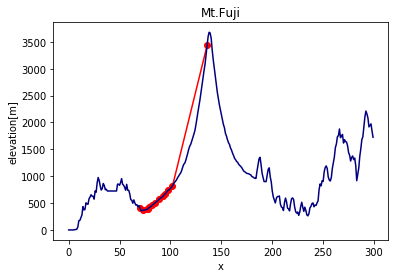

In [41]:
initial_location = 136 # 初期地点

location_history,  elevation_history, gradients, minimum_location, minimum_elevation = find_minimum_elevation(locations, elevations, initial_location, ALPHA , DELTA)

print("地点の変化:{}".format(location_history))
print("標高の変化:{}".format(elevation_history))
print("")

print("勾配の変化:{}".format(gradients))
print("")

print("最小値を取る地点：{}".format(minimum_location))
print("標高の最小値:{}".format(minimum_elevation))

plt.plot(location_history, elevation_history, color ="r" , marker="o") # 最小値を探すまでの移動の軌跡をプロットする

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く

# 【問題4】初期値の変更

- 初期値を以下の値で最小値を探索した。

- 20
- 60
- 100
- 140
- 180
- 220
- 260
- 299

地点の変化:[20, 33, 27, 31, 51, 41, 41]
標高の変化:[580.5, 770.92, 701.94, 817.0, 880.44, 724.5, 724.5]

勾配の変化:[102.7, 27.9, -22.0, -102.2, 49.4, 0.0]

最小値を取る地点：41
標高の最小値:724.5


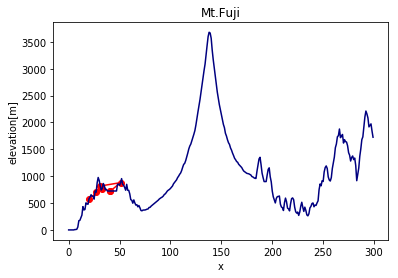

In [42]:
initial_location = 20 # 初期地点

location_history,  elevation_history, gradients, minimum_location, minimum_elevation = find_minimum_elevation(locations, elevations, initial_location, ALPHA , DELTA)

print("地点の変化:{}".format(location_history))
print("標高の変化:{}".format(elevation_history))
print("")

print("勾配の変化:{}".format(gradients))
print("")

print("最小値を取る地点：{}".format(minimum_location))
print("標高の最小値:{}".format(minimum_elevation))

plt.plot(location_history, elevation_history, color ="r" , marker="o") # 最小値を探すまでの移動の軌跡をプロットする

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く

地点の変化:[60, 73, 70, 78, 77]
標高の変化:[672.24, 368.91, 412.27, 390.14, 386.64]

勾配の変化:[-64.2, 13.2, -41.9, 3.5]

最小値を取る地点：78
標高の最小値:390.14


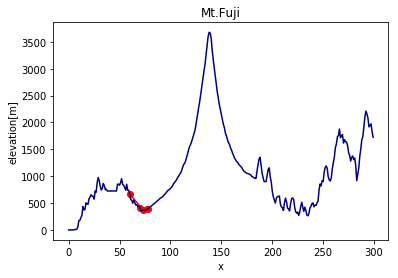

In [43]:
initial_location = 60 # 初期地点

location_history,  elevation_history, gradients, minimum_location, minimum_elevation = find_minimum_elevation(locations, elevations, initial_location, ALPHA , DELTA)

print("地点の変化:{}".format(location_history))
print("標高の変化:{}".format(elevation_history))
print("")

print("勾配の変化:{}".format(gradients))
print("")

print("最小値を取る地点：{}".format(minimum_location))
print("標高の最小値:{}".format(minimum_elevation))

plt.plot(location_history, elevation_history, color ="r" , marker="o") # 最小値を探すまでの移動の軌跡をプロットする

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く

地点の変化:[140, 159, 172, 178, 180, 186, 164, 169, 173, 176, 177]
標高の変化:[3567.76, 1525.57, 1095.73, 1033.52, 993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91]

勾配の変化:[-97.1, -65.4, -29.1, -10.4, -28.5, 109.6, -27.0, -19.0, -14.7, -4.0]

最小値を取る地点：176
標高の最小値:1049.33


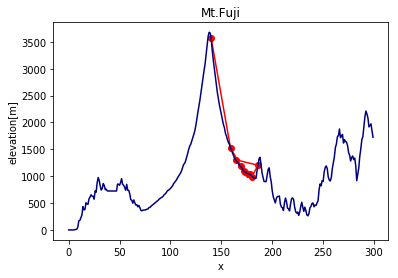

In [44]:
initial_location = 140 # 初期地点

location_history,  elevation_history, gradients, minimum_location, minimum_elevation = find_minimum_elevation(locations, elevations, initial_location, ALPHA , DELTA)

print("地点の変化:{}".format(location_history))
print("標高の変化:{}".format(elevation_history))
print("")

print("勾配の変化:{}".format(gradients))
print("")

print("最小値を取る地点：{}".format(minimum_location))
print("標高の最小値:{}".format(minimum_elevation))

plt.plot(location_history, elevation_history, color ="r" , marker="o") # 最小値を探すまでの移動の軌跡をプロットする

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く

地点の変化:[180, 186, 164, 169, 173, 176, 177]
標高の変化:[993.63, 1203.92, 1306.46, 1182.32, 1081.07, 1049.33, 1043.91]

勾配の変化:[-28.5, 109.6, -27.0, -19.0, -14.7, -4.0]

最小値を取る地点：176
標高の最小値:1049.33


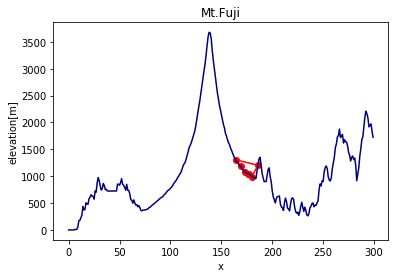

In [45]:
initial_location = 180 # 初期地点

location_history,  elevation_history, gradients, minimum_location, minimum_elevation = find_minimum_elevation(locations, elevations, initial_location, ALPHA , DELTA)

print("地点の変化:{}".format(location_history))
print("標高の変化:{}".format(elevation_history))
print("")

print("勾配の変化:{}".format(gradients))
print("")

print("最小値を取る地点：{}".format(minimum_location))
print("標高の最小値:{}".format(minimum_elevation))

plt.plot(location_history, elevation_history, color ="r" , marker="o") # 最小値を探すまでの移動の軌跡をプロットする

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く

地点の変化:[220, 217, 224, 229, 214, 227, 215, 239, 228, 206, 205]
標高の変化:[595.53, 354.39, 312.76, 514.97, 526.51, 332.39, 405.96, 491.04, 440.61, 622.89, 620.23]

勾配の変化:[13.4, -37.3, -26.4, 74.4, -65.8, 62.1, -120.6, 53.3, 108.2, 2.7]

最小値を取る地点：206
標高の最小値:622.89


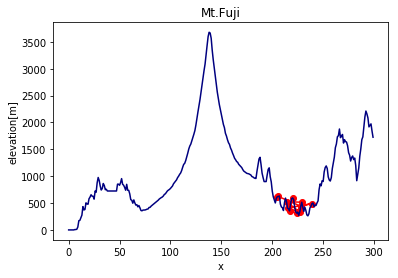

In [46]:
initial_location = 220 # 初期地点

location_history,  elevation_history, gradients, minimum_location, minimum_elevation = find_minimum_elevation(locations, elevations, initial_location, ALPHA , DELTA)

print("地点の変化:{}".format(location_history))
print("標高の変化:{}".format(elevation_history))
print("")

print("勾配の変化:{}".format(gradients))
print("")

print("最小値を取る地点：{}".format(minimum_location))
print("標高の最小値:{}".format(minimum_elevation))

plt.plot(location_history, elevation_history, color ="r" , marker="o") # 最小値を探すまでの移動の軌跡をプロットする

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く

地点の変化:[260, 240, 238, 232, 216, 219, 200, 234, 251, 215, 239, 228, 206, 205]
標高の変化:[1243.66, 501.97, 437.7, 423.72, 391.72, 582.16, 723.66, 278.95, 1079.27, 405.96, 491.04, 440.61, 622.89, 620.23]

勾配の変化:[101.9, 10.9, 28.0, 79.3, -14.2, 94.7, -171.5, -84.3, 177.7, -120.6, 53.3, 108.2, 2.7]

最小値を取る地点：206
標高の最小値:622.89


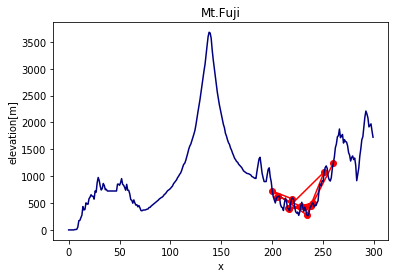

In [47]:
initial_location = 260 # 初期地点

location_history,  elevation_history, gradients, minimum_location, minimum_elevation = find_minimum_elevation(locations, elevations, initial_location, ALPHA , DELTA)

print("地点の変化:{}".format(location_history))
print("標高の変化:{}".format(elevation_history))
print("")

print("勾配の変化:{}".format(gradients))
print("")

print("最小値を取る地点：{}".format(minimum_location))
print("標高の最小値:{}".format(minimum_elevation))

plt.plot(location_history, elevation_history, color ="r" , marker="o") # 最小値を探すまでの移動の軌跡をプロットする

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く

地点の変化:[299, 266, 241, 255, 287, 259, 225, 221, 227, 215, 239, 228, 206, 205]
標高の変化:[1725.8, 1878.56, 430.96, 986.58, 1510.22, 1141.8, 332.88, 563.7, 332.39, 405.96, 491.04, 440.61, 622.89, 620.23]

勾配の変化:[-115.6, 122.8, -71.0, -157.7, 137.6, 169.1, 20.1, -31.8, 62.1, -120.6, 53.3, 108.2, 2.7]

最小値を取る地点：206
標高の最小値:622.89


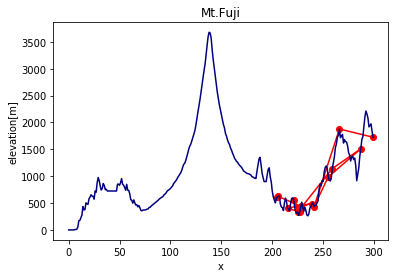

In [48]:
initial_location = 299 # 初期地点

location_history,  elevation_history, gradients, minimum_location, minimum_elevation = find_minimum_elevation(locations, elevations, initial_location, ALPHA , DELTA)

print("地点の変化:{}".format(location_history))
print("標高の変化:{}".format(elevation_history))
print("")

print("勾配の変化:{}".format(gradients))
print("")

print("最小値を取る地点：{}".format(minimum_location))
print("標高の最小値:{}".format(minimum_elevation))

plt.plot(location_history, elevation_history, color ="r" , marker="o") # 最小値を探すまでの移動の軌跡をプロットする

plt.xlabel("x")
plt.ylabel("elevation[m]")
plt.title("Mt.Fuji")
plt.plot(locations, elevations, c = "navy") # 全体の等構図を描く

### 課題：エラーへの対応

色々な初期値のパターンを試したところ、計算過程で以下のエラーが生じることが分かった。

- 近傍の勾配が極めて小さい地点を初期値に選んだ場合（エラーが発生） → その地点をminimum_pointとする必要あり
- 移動先がデータの範囲外になる場合（エラーが発生）　→　バックステップするロジックが必要

### Take away

- 勾配降下法の基礎を理解した。

- 局所最適解に陥らないために、初期は学習率を高めに設定しつつ、計算が進むにつれて学習率を低下させていくと良い。